# Multimedia Forensics Exercise 1
Tientso Ning

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import math
import sys
%matplotlib inline

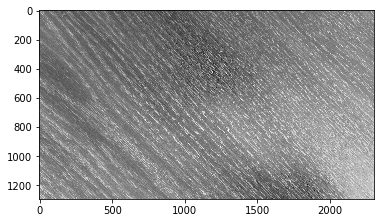

In [2]:
#./CC_TP1_photos/DSC_XXXX
img = cv2.imread("./CC_TP1_photos/DSC_0003.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="Greys")

In [3]:
#convert all images to grayscale
images = []
for i in range(1, 10):
    img = cv2.imread("./CC_TP1_photos/DSC_000{0}.png".format(i))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(gray)

img = cv2.imread("./CC_TP1_photos/DSC_0010.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
images.append(gray)

for i in range(1,6):
    img = cv2.imread("./CC_TP1_photos/DSC_001{0}.png".format(i))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(gray)
print(len(images))

15


(1296, 2304)
(1000, 1000)


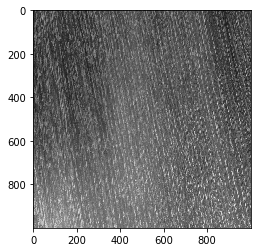

In [4]:
#we need to cut each image off
print(images[0].shape)
test = images[0][0:1000,0:1000]
print(test.shape)
plt.imshow(test, cmap="Greys")

#this crops all images
for i in range(0, len(images)):
    images[i] = images[i][0:1000,0:1000] 

uint8 (1000, 1000)


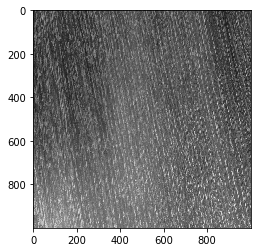

In [5]:
#convert images to double precision
#for i in range(0,len(images)):
#    images[i] = cv2.normalize(images[i].astype('int'),None,0,255,cv2.NORM_MINMAX)

#check whether or not we good...
print(images[0].dtype, images[0].shape)
plt.imshow(images[0], cmap="Greys")

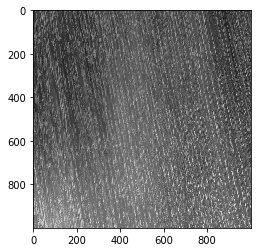

In [6]:
#denoising seems like it only works on int8 for opencv
test = cv2.fastNlMeansDenoising(images[0])
plt.imshow(test, cmap="Greys")

In [7]:
filtered = []
for i in range(0, len(images)):
    filtered.append(cv2.fastNlMeansDenoising(images[i], h=2))
print(len(filtered))

15


In [8]:
W = []
for i in range(0, len(images)):
    W.append(images[i]-filtered[i])
print(len(W))

15


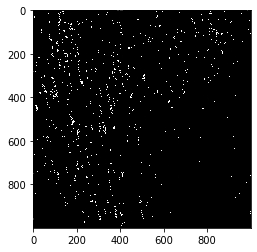

In [48]:
#show that the noise is something that we're looking at
plt.imshow(W[0], cmap="Greys_r")

In [72]:
def calc_contribution(W, I):
    ret = np.divide(W*I,I**2)
    ret[ret == 0] = 1
    ret[ret > 255] = 255
    ret[np.isnan(ret)] = 1
    return ret

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


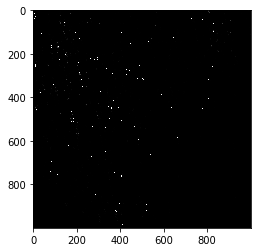

In [73]:
test_finger = calc_contribution(W[0],images[0])
plt.imshow(test_finger, cmap="Greys_r")

In [74]:
#store all the fingerprints
fingerprints = []
for i in range(0, len(images)):
    fingerprints.append(calc_contribution(W[i],images[i]))
print(len(fingerprints))

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


15


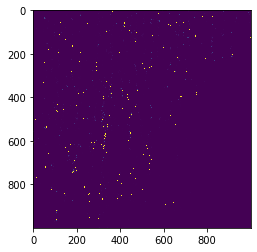

In [75]:
plt.imshow(fingerprints[3])

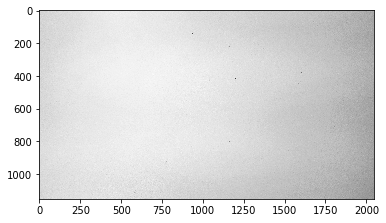

In [76]:
camera_b = []
for i in range(1,6):
    img = cv2.imread("./camera_b_photos/{0}.PNG".format(i), 0)
    camera_b.append(img)
plt.imshow(camera_b[3], cmap="Greys_r") #supposed to be mostly white

In [77]:
#calculate fingerprint B

for i in range(0, len(camera_b)):
    camera_b[i] = camera_b[i][0:1000,0:1000]

filtered_b = []
for i in range(0, len(camera_b)):
    filtered_b.append(cv2.fastNlMeansDenoising(camera_b[i], h=2))

W_b = []
for i in range(0, len(camera_b)):
    W_b.append(camera_b[i]-filtered_b[i])

fingerprints_b = []
for i in range(0, len(camera_b)):
    fingerprints_b.append(calc_contribution(W_b[i],camera_b[i]))
print(len(fingerprints_b))

5


/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


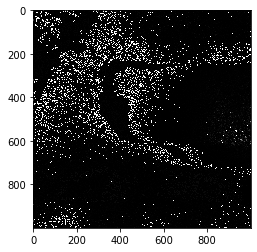

In [78]:
plt.imshow(fingerprints_b[0], cmap="Greys_r")

# Correlations

In [79]:
def our_corr2 (a,b):
    c = (a-np.mean(a))*(b-np.mean(b))
    d = (a-np.mean(a))**2
    e = (b-np.mean(b))**2
    return np.sum(c)/np.sqrt(np.sum(d)*np.sum(e))

In [85]:
#test sample corr
our_corr2(fingerprints[0], fingerprints_b[3])

0.0003702970290245296

Text(0.5, 1.0, 'Correlation for Image set A & B')

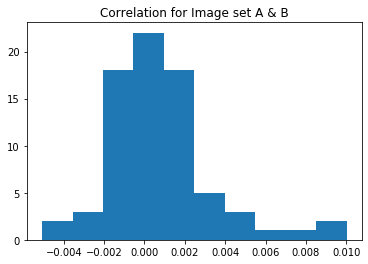

In [89]:
#compare for all fingerprints a b
compare1 = []
for i in range(0, len(fingerprints_b)):
    for j in range(0, len(fingerprints)):
        compare1.append(our_corr2(fingerprints[j], fingerprints_b[i]))
plt.hist(compare1)
plt.title("Correlation for Image set A & B")

As we can see, the correlation is centered around 0.0 (meaning that the two are not correlated) and this should be expected since Image set A and B are taken on two different cameras (Image Set A taken on my own, Image set B courtesy of Kevin)

In [93]:
#calc fingerprint for online Image set C
#load image set C
imgset_c = []
for i in range (1,5):
    imgset_c.append(cv2.imread("./camera_c_photos/{0}.JPG".format(i),0))
print(len(imgset_c))

for i in range(0, len(imgset_c)):
    imgset_c[i] = imgset_c[i][0:1000,0:1000]

filtered_c = []
for i in range(0, len(imgset_c)):
    filtered_c.append(cv2.fastNlMeansDenoising(imgset_c[i], h=2))

W_c = []
for i in range(0, len(imgset_c)):
    W_c.append(imgset_c[i]-filtered_c[i])

fingerprints_c = []
for i in range(0, len(imgset_c)):
    fingerprints_c.append(calc_contribution(W_c[i],imgset_c[i]))
print(len(fingerprints_c))


4
4


/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Correlation for Image set A & C')

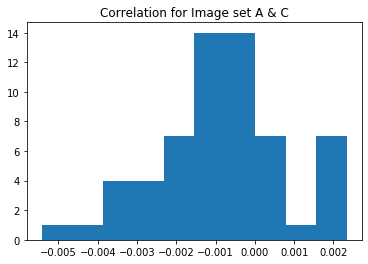

In [94]:
#compare for all fingerprints a c
compare2 = []
for i in range(0, len(fingerprints_c)):
    for j in range(0, len(fingerprints)):
        compare2.append(our_corr2(fingerprints[j], fingerprints_c[i]))
plt.hist(compare2)
plt.title("Correlation for Image set A & C")

As we can see, the correlation is around 0.0 as well.